<a href="https://colab.research.google.com/github/revathys/AIMLLearn/blob/main/colab_activity13_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Colab activity 13.2: Decision Boundaries with Two Variable

**Expected Time = 60 minutes**


In the first examples, your work has utilized a straight vertical line as the decision boundary for logistic regression. This is what a decision boundary looks like with only one feature, however with two features the decision boundary becomes a linear function of the two inputs. In this activity, you will focus on generating functions for these boundaries and show strategies for visualizing these boundaries.

#### Index

  - [Problem 1](#-Problem-1)
  - [Problem 2](#-Problem-2)
  - [Problem 3](#-Problem-3)
  - [Problem 4](#-Problem-4)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split

### The Data

Again, you will use the penguins data from Seaborn.  This time, you will use two features -- `flipper_length_mm` and `bill_length_mm` to build a logistic model and visualize the decision boundary.  The data is loaded and visualized below.  

In [2]:
penguins = sns.load_dataset('penguins').dropna()
penguins = penguins.loc[(penguins['species'] == 'Adelie') | (penguins['species'] == 'Gentoo')]
X = penguins.drop('species', axis = 1)[['flipper_length_mm', 'bill_length_mm']]
y = np.where(penguins.species == 'Adelie', 0, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [3]:
X.head()

,flipper_length_mm,bill_length_mm
0,181.0,39.1
1,186.0,39.5
2,195.0,40.3
4,193.0,36.7
5,190.0,39.3


<Axes: xlabel='flipper_length_mm', ylabel='bill_length_mm'>

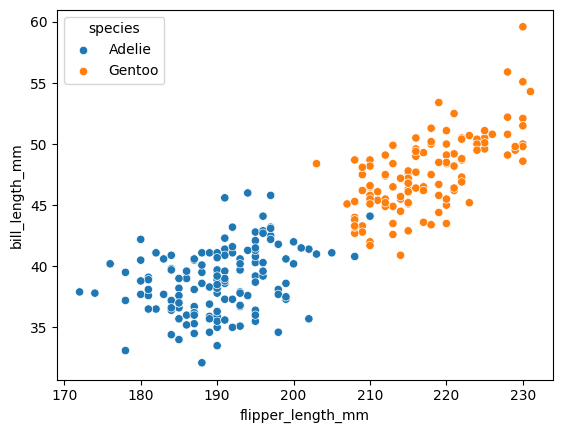

In [4]:
sns.scatterplot(data = penguins, x = 'flipper_length_mm', y = 'bill_length_mm', hue = 'species')

[Back to top](#-Index)

### Problem 1

#### A Logistic Model


Instantiate a `LogisticRegression` estimator as `log_reg` below and fit on the training data `X_train` and `y_train`.

In [5]:


log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)



# Answer check
print(log_reg)

LogisticRegression()


[Back to top](#-Index)

### Problem 2

#### Examining the coefficients


With two variables, the Sigma function is given by:

$$\sigma(x) = \frac{1}{1 + e^{-z}},$$

where

$$z = \beta_0 + \beta_1 * x_0 + \beta_2 * x_1.$$

Below, assign the intercept to  `beta_0` and the  coefficients to `beta_1` and `beta_2`, respectively.

Note that $x_0$ is the flipper length.  

In [14]:


#z = log_reg.intercept_ + log_reg.coef_[0][0] * X_train['flipper_length_mm'] + log_reg.coef_[0][1] * X_train['bill_length_mm']
beta_0 = log_reg.intercept_[0]
beta_1 = log_reg.coef_[0][0]
beta_2 = log_reg.coef_[0][1]


# Answer check
print(f'z = {beta_0: .2f} + {beta_1: .2f}x0 + {beta_2: .2f}x1')

z = -156.07 +  0.61x0 +  0.69x1


[Back to top](#-Index)

### Problem 3

#### Visualizing the decision boundary


<center>
    <img src = 'images/dboundary.png' />
</center>


There is both a brute force and more formal approach for visualizing the decision boundary.

With two variables we can directly solve for the linear function in terms of `x_0` and  `beta`'s. Upon doing so we find a linear function defined as:

$$y = -\frac{\beta_1}{\beta_2} * x_0 - \frac{\beta_0}{\beta_2}$$

Complete the function `decision_boundary` below that takes in `x_0` and  `beta`'s. This function should return the appropriate value for the predicitons based on the formula above.  Uncomment the plot to verify your results using the defined `x = np.linspace`.

In [15]:


def decision_boundary(x0, beta_0, beta_1, beta_2):
    '''
    Function returns values for linear decision boundaries
    in binary classification setting according to the formula
    y = -beta_1/beta_2 * x0 - beta_0/beta_2

    Arguments
    ---------
    x0: np.array
        domain for evaluation of function

    beta_0: float
         intercept from fit logistic model
    beta_1: float
        first coefficient from logistic model
    beta_2: float
        second coefficient from logistic model

    Returns
    -------
    np.array
        values of y
    '''

    y = -beta_1/beta_2 * x0 - beta_0/beta_2
    return y


# Answer check
x = np.linspace(165, 240, 100)
print(decision_boundary(x, beta_0, beta_1, beta_2)[0], decision_boundary(x, beta_0, beta_1, beta_2)[-1])

79.6167243149128 13.018550496486569


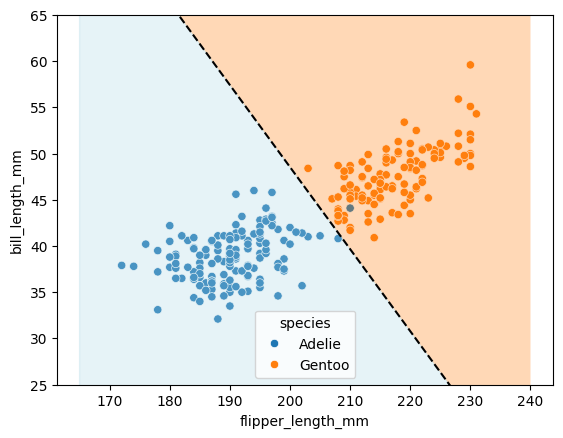

In [16]:
## code for figure
x = np.linspace(165, 240, 100)
sns.scatterplot(data = penguins, x = 'flipper_length_mm', y = 'bill_length_mm', hue = 'species')
plt.plot(x, decision_boundary(x, beta_0, beta_1, beta_2), '--', color = 'black')
plt.ylim(25, 65)
plt.fill_between(x, decision_boundary(x, beta_0, beta_1, beta_2), alpha = 0.3, color = 'lightblue')
plt.fill_between(x, decision_boundary(x, beta_0, beta_1, beta_2), np.repeat(70, 100), alpha = 0.3)

[Back to top](#-Index)

### Problem 4

#### Comparing regressors


Now, fit a second regressor using the argument `C = 0.001`. Compare the decision boundary by using what you've seen earlier. How did the decision boundary change based on this?  The slope of the new decision boundary should either be greater than or less than the default settings. Assign your answer as a string -- `greater than` or `less than` -- to `ans4` below. Hint: Remember that the slope is negative.



greater than


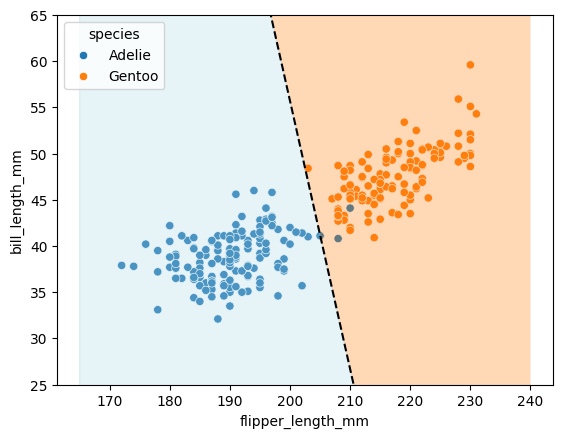

In [18]:


ans4 = 'greater than'
log_reg_2 = LogisticRegression(C = 0.001)
log_reg_2.fit(X_train, y_train)
beta_0_2 = log_reg_2.intercept_[0]
beta_1_2 = log_reg_2.coef_[0][0]
beta_2_2 = log_reg_2.coef_[0][1]
x = np.linspace(165, 240, 100)
sns.scatterplot(data = penguins, x = 'flipper_length_mm', y = 'bill_length_mm', hue = 'species')
plt.plot(x, decision_boundary(x, beta_0_2, beta_1_2, beta_2_2), '--', color = 'black')
plt.ylim(25, 65)
plt.fill_between(x, decision_boundary(x, beta_0_2, beta_1_2, beta_2_2), alpha = 0.3, color = 'lightblue')
plt.fill_between(x, decision_boundary(x, beta_0_2, beta_1_2, beta_2_2), np.repeat(70, 100), alpha = 0.3)
# Answer check
print(ans4)